In [1]:
# Uncomment the below line and Install 'mlxtend' Library if not installed already
!pip install mlxtend

     ---------------------------------------- 1.3/1.3 MB 1.6 MB/s eta 0:00:00


# book data

In [2]:
import mlxtend

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("book.csv")

In [5]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [7]:
df.shape

(2000, 11)

In [8]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

C:\Users\UMAPATHY\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [9]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules
rules.sort_values('lift',ascending = False)

## leverage(X->Y) - Support(X->Y)-Support(X).Support(Y) [-1 to +1].
## leverage is a proportion of additional elements covered by both the antecedent and consequence above the expected if independent.
## Conviction(X->Y) - (Support(X).Support(NotY))/(Support(X & NotY)).
## Conviction is a measure of the implication and has value 1 if items are unrelated.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


In [10]:
rules.sort_values('lift')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
20,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
21,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000


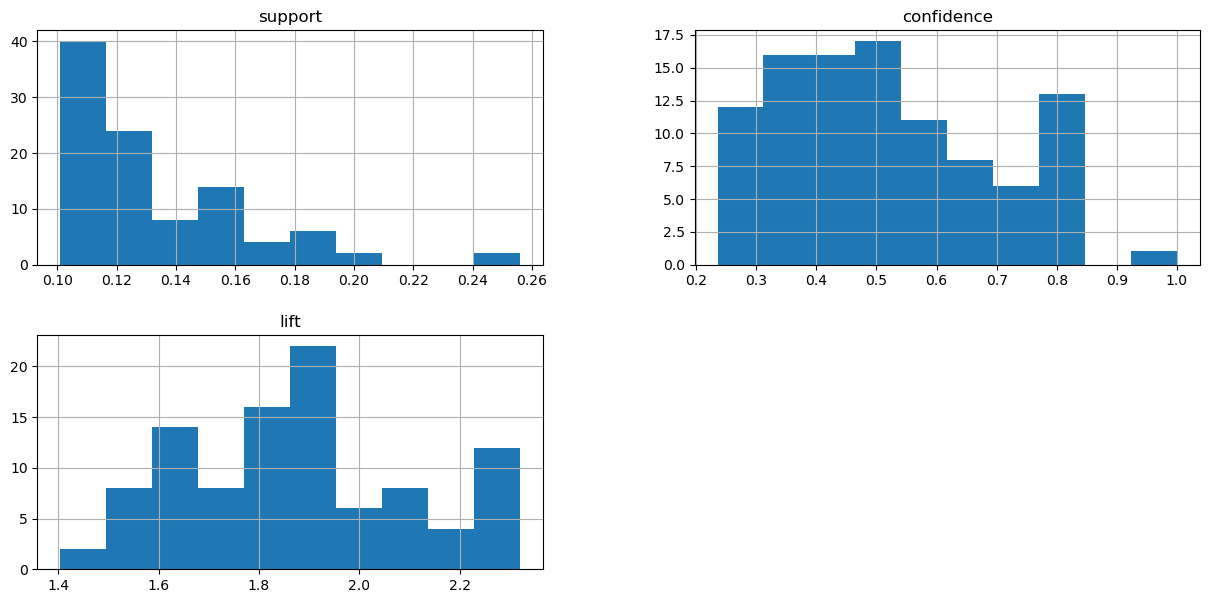

In [11]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

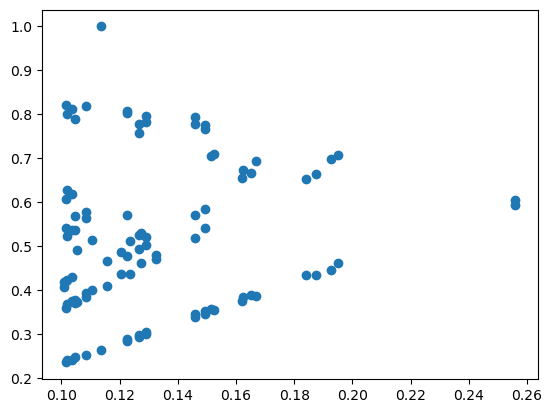

In [12]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

C:\Users\UMAPATHY\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\UMAPATHY\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\UMAPATHY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


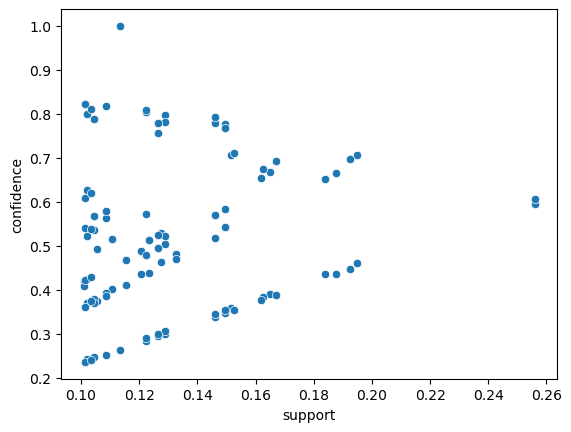

In [13]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules,)

plt.show()

In [15]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets

C:\Users\UMAPATHY\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [16]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules
rules.sort_values('lift',ascending = False)

## leverage(X->Y) - Support(X->Y)-Support(X).Support(Y) [-1 to +1].
## leverage is a proportion of additional elements covered by both the antecedent and consequence above the expected if independent.
## Conviction(X->Y) - (Support(X).Support(NotY))/(Support(X & NotY)).
## Conviction is a measure of the implication and has value 1 if items are unrelated.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


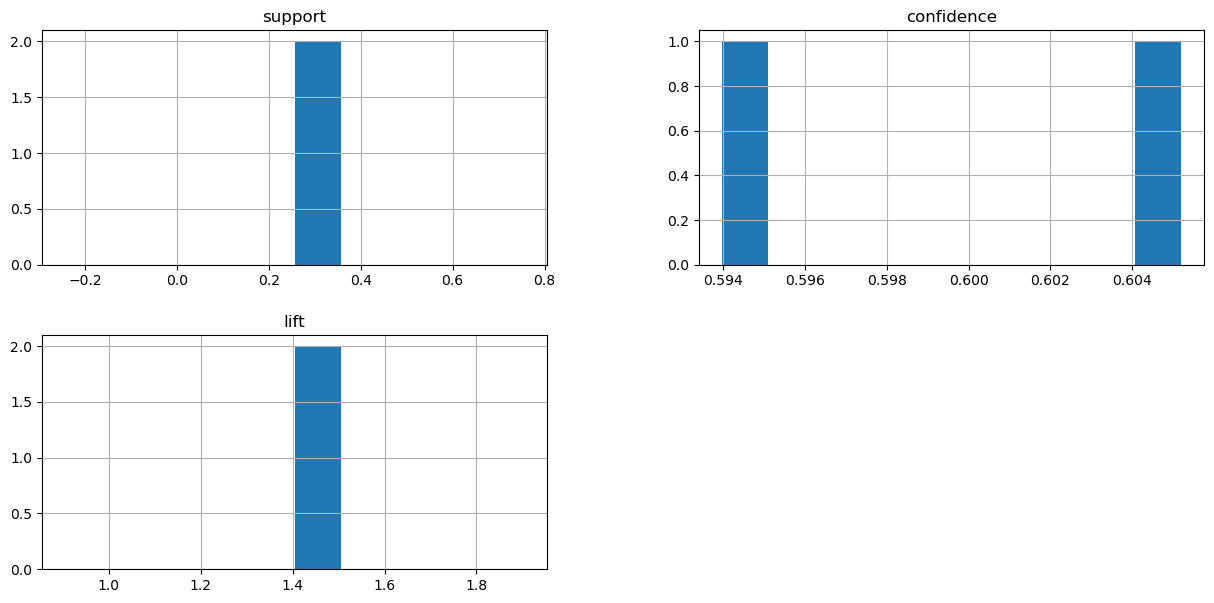

In [17]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

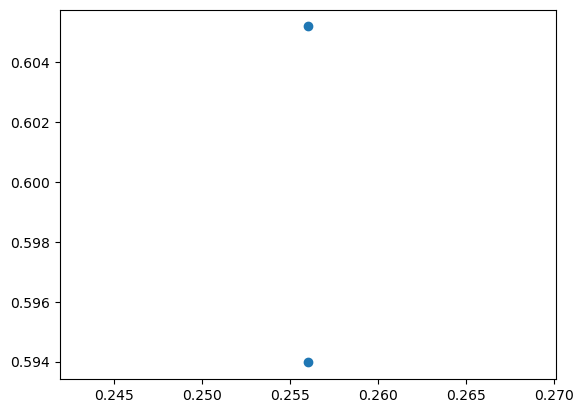

In [18]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

C:\Users\UMAPATHY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


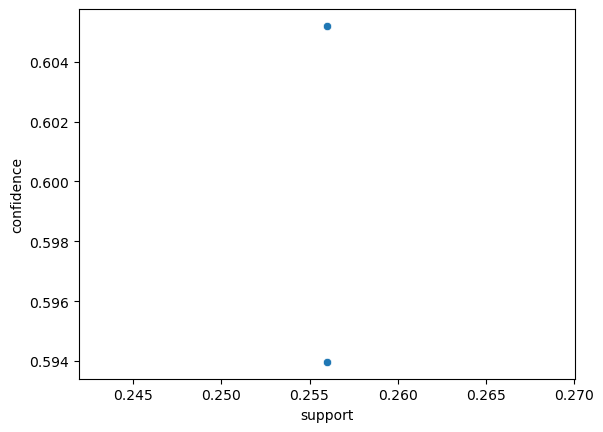

In [19]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules,)

plt.show()

In [20]:
frequent_itemsets = apriori(df, min_support=0.25, use_colnames=True)
frequent_itemsets

C:\Users\UMAPATHY\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.423,(ChildBks)
1,0.431,(CookBks)
2,0.282,(DoItYBks)
3,0.276,(GeogBks)
4,0.256,"(CookBks, ChildBks)"


In [21]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules
rules.sort_values('lift',ascending = False)

## leverage(X->Y) - Support(X->Y)-Support(X).Support(Y) [-1 to +1].
## leverage is a proportion of additional elements covered by both the antecedent and consequence above the expected if independent.
## Conviction(X->Y) - (Support(X).Support(NotY))/(Support(X & NotY)).
## Conviction is a measure of the implication and has value 1 if items are unrelated.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


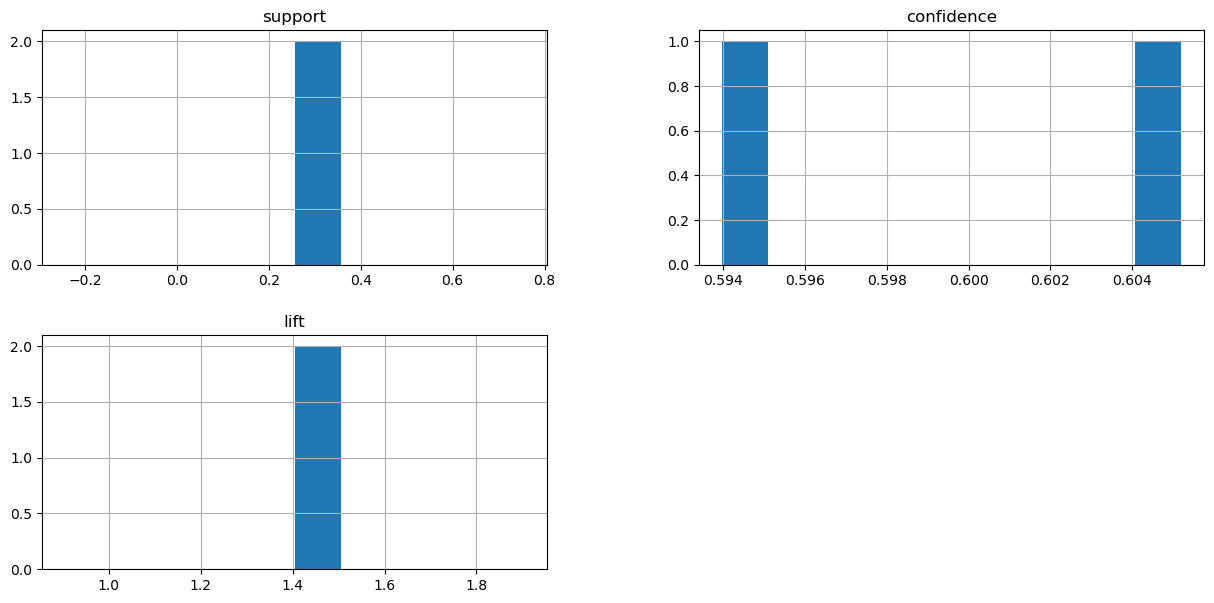

In [22]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

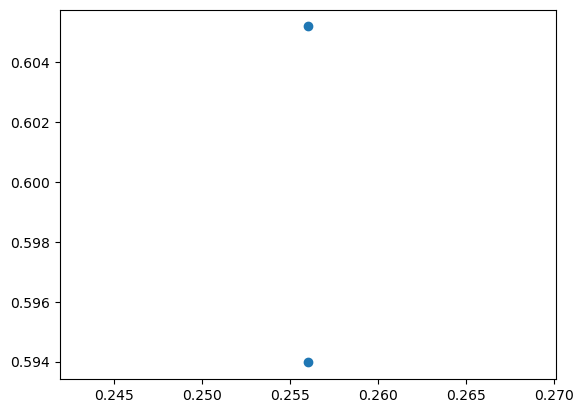

In [23]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

C:\Users\UMAPATHY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


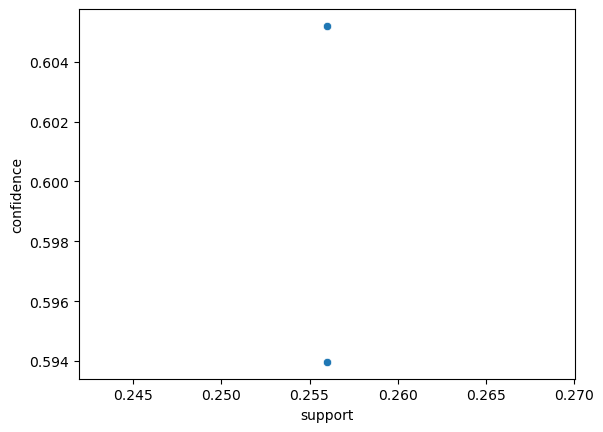

In [24]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules,)

plt.show()

# my _movies data

In [25]:
# Uncomment the below line and Install 'mlxtend' Library if not installed already
!pip install mlxtend

In [26]:
import mlxtend

In [27]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import matplotlib.pyplot as plt

In [28]:
df1=pd.read_csv("my_movies.csv")

In [29]:
df1.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [30]:
data1=pd.get_dummies(df1)
data1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [31]:
frequent_itemsets = apriori(data1, min_support=0.1, use_colnames=True)
frequent_itemsets

C:\Users\UMAPATHY\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Green Mile, LOTR1, V2_LOTR1, V1_Sixth Sense, ..."
1393,0.1,"(Green Mile, LOTR1, V2_LOTR1, V1_Sixth Sense, ..."
1394,0.1,"(Green Mile, V2_LOTR1, V1_Sixth Sense, Harry P..."
1395,0.1,"(Green Mile, LOTR1, V2_LOTR1, V1_Sixth Sense, ..."


In [32]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules
rules.sort_values('lift',ascending = False)

## leverage(X->Y) - Support(X->Y)-Support(X).Support(Y) [-1 to +1].
## leverage is a proportion of additional elements covered by both the antecedent and consequence above the expected if independent.
## Conviction(X->Y) - (Support(X).Support(NotY))/(Support(X & NotY)).
## Conviction is a measure of the implication and has value 1 if items are unrelated.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32108,"(V5_LOTR2, Sixth Sense, Harry Potter1, V3_Harr...","(Green Mile, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42182,"(V1_Sixth Sense, LOTR1, Harry Potter1, V5_LOTR2)","(Green Mile, V2_LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42170,"(V1_Sixth Sense, Green Mile, LOTR2, Harry Pott...","(V5_LOTR2, LOTR1, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42171,"(V1_Sixth Sense, Green Mile, LOTR2, V5_LOTR2)","(LOTR1, Harry Potter1, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42172,"(V1_Sixth Sense, Green Mile, Harry Potter1, V5...","(LOTR1, LOTR2, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
...,...,...,...,...,...,...,...,...,...
205,(Green Mile),"(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.5,1.0,0.00,1.0
213,"(Gladiator, Sixth Sense)",(V1_Sixth Sense),0.5,0.2,0.1,0.2,1.0,0.00,1.0
1696,"(Gladiator, Sixth Sense)","(V1_Sixth Sense, V4_Green Mile)",0.5,0.2,0.1,0.2,1.0,0.00,1.0
214,(V1_Sixth Sense),"(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.5,1.0,0.00,1.0


In [33]:
rules.sort_values('lift')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6262,"(V1_Sixth Sense, Green Mile, V4_Green Mile)","(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0
205,(Green Mile),"(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0
6273,"(Gladiator, Sixth Sense)","(V1_Sixth Sense, Green Mile, V4_Green Mile)",0.5,0.2,0.1,0.200000,1.000000,0.00,1.0
202,"(Gladiator, Sixth Sense)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0
240,"(Gladiator, Sixth Sense)",(V4_Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0
1591,"(V1_Sixth Sense, Green Mile)","(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0
1588,"(Gladiator, Sixth Sense)","(V1_Sixth Sense, Green Mile)",0.5,0.2,0.1,0.200000,1.000000,0.00,1.0
1696,"(Gladiator, Sixth Sense)","(V1_Sixth Sense, V4_Green Mile)",0.5,0.2,0.1,0.200000,1.000000,0.00,1.0
1627,"(Gladiator, Sixth Sense)","(Green Mile, V4_Green Mile)",0.5,0.2,0.1,0.200000,1.000000,0.00,1.0
1699,"(V1_Sixth Sense, V4_Green Mile)","(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0


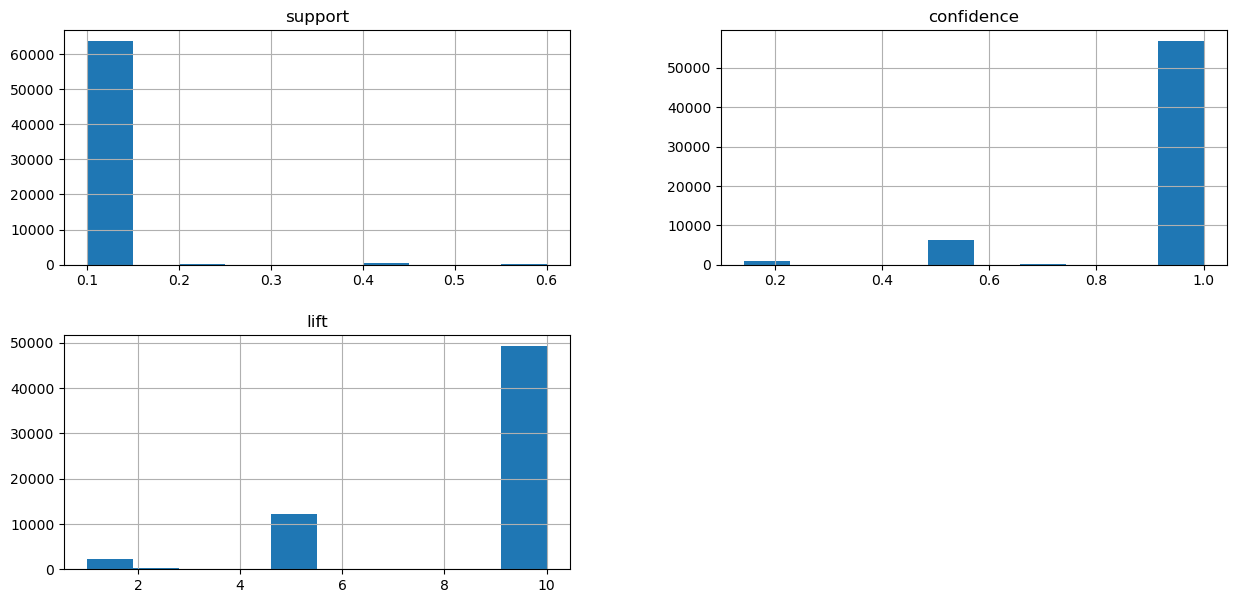

In [34]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

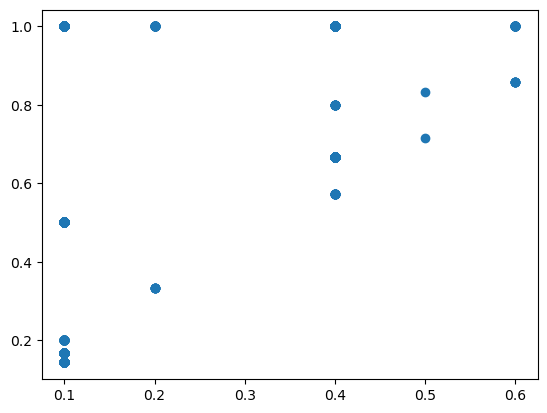

In [35]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

C:\Users\UMAPATHY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


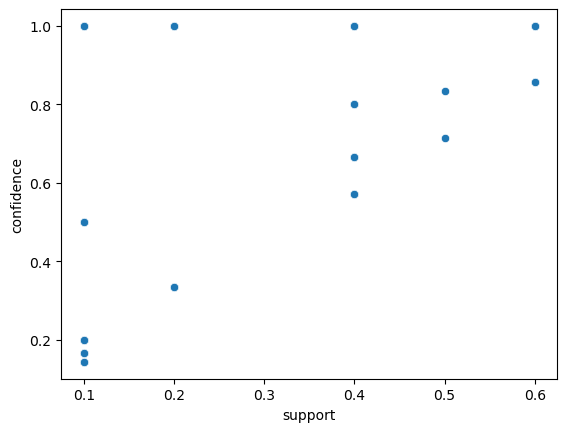

In [36]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules,)

plt.show()

In [44]:
frequent_itemsets = apriori(data1, min_support=0.3, use_colnames=True)
frequent_itemsets

C:\Users\UMAPATHY\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Gladiator, V2_Patriot, Sixth Sense, Patriot, ..."
59,0.4,"(Gladiator, V2_Patriot, Sixth Sense, V1_Gladia..."
60,0.4,"(V2_Patriot, Sixth Sense, Patriot, V1_Gladiato..."
61,0.4,"(Gladiator, V2_Patriot, Patriot, V1_Gladiator,..."


In [45]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules
rules.sort_values('lift',ascending = False)

## leverage(X->Y) - Support(X->Y)-Support(X).Support(Y) [-1 to +1].
## leverage is a proportion of additional elements covered by both the antecedent and consequence above the expected if independent.
## Conviction(X->Y) - (Support(X).Support(NotY))/(Support(X & NotY)).
## Conviction is a measure of the implication and has value 1 if items are unrelated.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
601,(V3_Sixth Sense),"(Gladiator, V2_Patriot, Sixth Sense, Patriot, ...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
282,"(V3_Sixth Sense, V1_Gladiator)","(Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
455,"(Gladiator, Sixth Sense, V2_Patriot)","(V3_Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
225,"(Gladiator, V3_Sixth Sense)","(Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
87,(V3_Sixth Sense),"(Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
...,...,...,...,...,...,...,...,...,...
43,"(Gladiator, V2_Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
175,(Sixth Sense),"(Gladiator, Patriot, V2_Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
40,(Sixth Sense),"(Gladiator, V1_Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
37,"(Gladiator, V1_Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


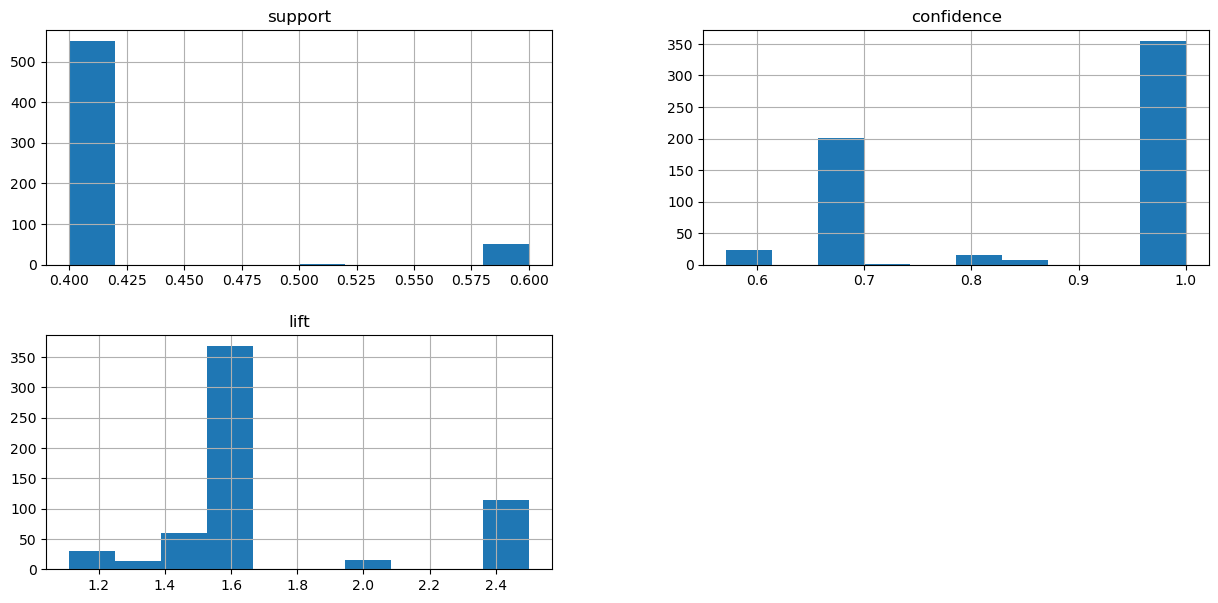

In [46]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

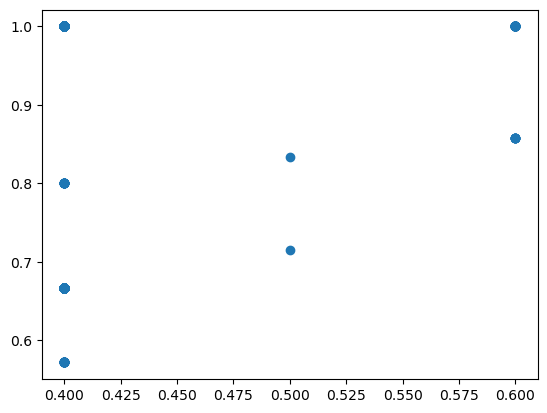

In [47]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

C:\Users\UMAPATHY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


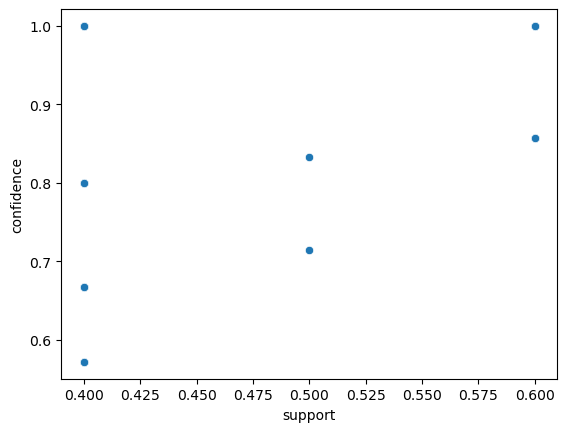

In [48]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules,)

plt.show()

In [51]:
frequent_itemsets = apriori(data1, min_support=0.2, use_colnames=True)
frequent_itemsets

C:\Users\UMAPATHY\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Gladiator, V2_Patriot, Sixth Sense, Patriot, ..."
77,0.4,"(Gladiator, V2_Patriot, Sixth Sense, V1_Gladia..."
78,0.4,"(V2_Patriot, Sixth Sense, Patriot, V1_Gladiato..."
79,0.4,"(Gladiator, V2_Patriot, Patriot, V1_Gladiator,..."


In [52]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules
rules.sort_values('lift',ascending = False)

## leverage(X->Y) - Support(X->Y)-Support(X).Support(Y) [-1 to +1].
## leverage is a proportion of additional elements covered by both the antecedent and consequence above the expected if independent.
## Conviction(X->Y) - (Support(X).Support(NotY))/(Support(X & NotY)).
## Conviction is a measure of the implication and has value 1 if items are unrelated.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
327,(V4_Green Mile),"(V1_Sixth Sense, Sixth Sense, Green Mile)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
322,"(Sixth Sense, V4_Green Mile)","(V1_Sixth Sense, Green Mile)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
40,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
41,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
176,"(V1_Sixth Sense, Green Mile)",(V4_Green Mile),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
...,...,...,...,...,...,...,...,...,...
48,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
51,"(Gladiator, V1_Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
10,(Sixth Sense),(V2_Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
11,(V2_Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


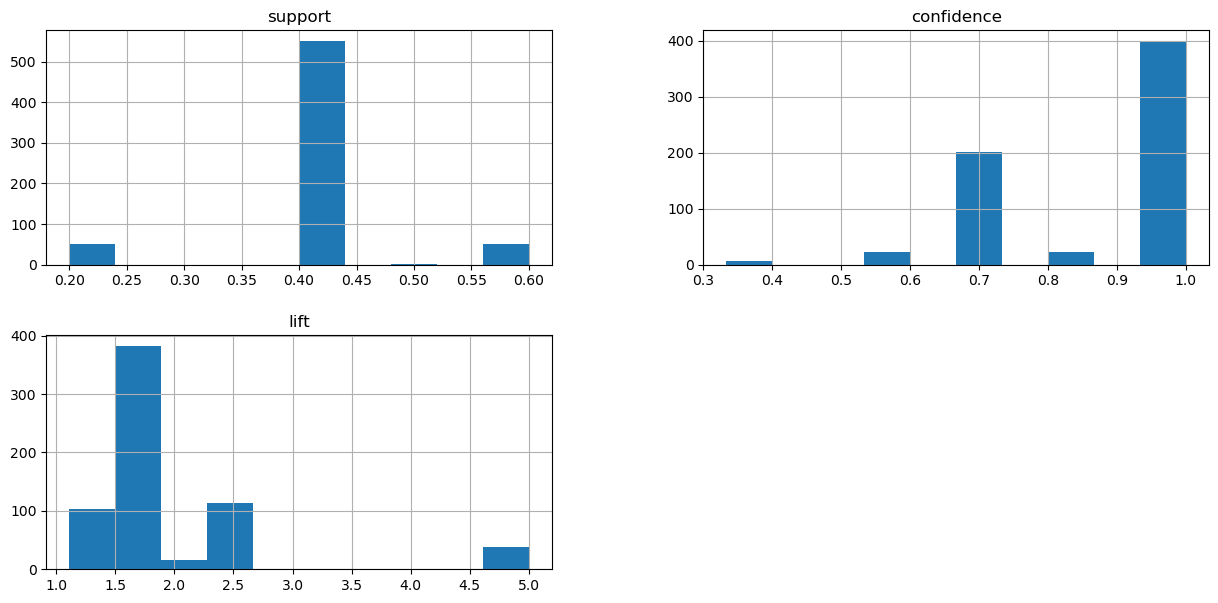

In [53]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

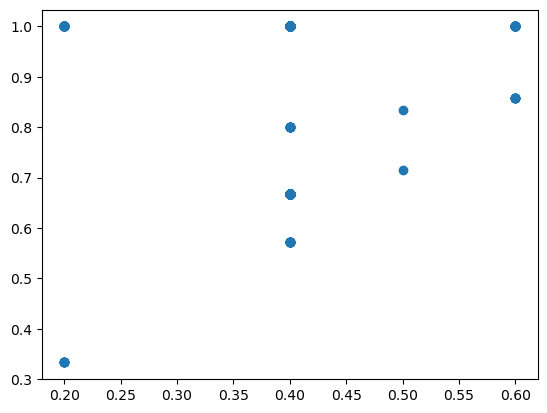

In [54]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

C:\Users\UMAPATHY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


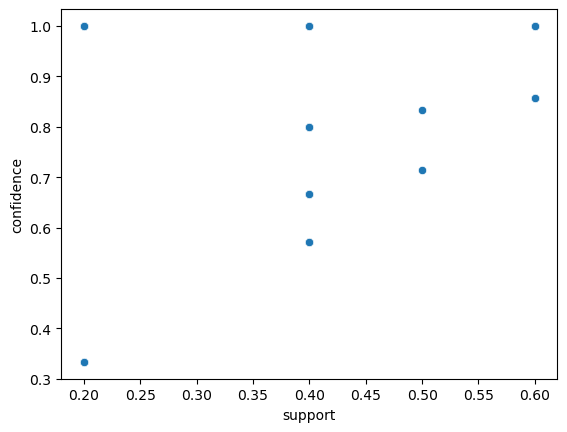

In [55]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules,)

plt.show()